https://www.kaggle.com/kemical/kickstarter-projects

1. Create empty repository on GitHub
2. Click on Clone repository. Add URSL to GitHub Repository and assign directory

# 1. Import libraries

In [1]:
from functions import *

# 2. Import and read data

In [2]:
get_list_of_zip_files(directory="C:\\Users\\KonuTech\\Downloads\\")[0:2]

['airbnb-recruiting-new-user-bookings.zip', 'archive.zip']

In [3]:
unzip_files(directory="C:\\Users\\KonuTech"
            ,output_directory="C:\\Users\\KonuTech\\Downloads\\kickstarter-projects-classification-techniques"
            ,zip_file_name="archive.zip")

Unpacked archive.zip to: C:\Users\KonuTech\Downloads\kickstarter-projects-classification-techniques



In [4]:
change_current_working_directory(directory="C:\\Users\\KonuTech\\Downloads\\kickstarter-projects-classification-techniques")

'C:\\Users\\KonuTech\\Downloads\\kickstarter-projects-classification-techniques'

In [5]:
get_list_of_files_by_extension(directory="C:\\Users\\KonuTech\\Downloads\\kickstarter-projects-classification-techniques"
                               ,extension="csv")

['ks-projects-201612.csv', 'ks-projects-201801.csv']

# 3. Data description

### Train data

In [28]:
ks_projects = pd.read_csv('ks-projects-201801.csv',index_col=["ID","launched", "name"])
#ks_projects = pd.read_csv('ks-projects-201801.csv')
ks_projects.head()

,,,category,main_category,currency,deadline,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,launched,name,,,,,,,,,,,,
1000002330,2015-08-11 12:12:28,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.000,0.000,failed,0,GB,0.000,0.000,1533.950
1000003930,2017-09-02 04:43:57,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.000,2421.000,failed,15,US,100.000,2421.000,30000.000
1000004038,2013-01-12 00:20:50,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.000,220.000,failed,3,US,220.000,220.000,45000.000
1000007540,2012-03-17 03:24:11,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.000,1.000,failed,1,US,1.000,1.000,5000.000
1000011046,2015-07-04 08:35:03,Community Film Project: The Art of Neighborhood Filmmaking,Film & Video,Film & Video,USD,2015-08-29,19500.000,1283.000,canceled,14,US,1283.000,1283.000,19500.000


In [29]:
ks_projects.select_dtypes(include=['int64', "uint8"])

,,,backers
ID,launched,name,
1000002330,2015-08-11 12:12:28,The Songs of Adelaide & Abullah,0
1000003930,2017-09-02 04:43:57,Greeting From Earth: ZGAC Arts Capsule For ET,15
1000004038,2013-01-12 00:20:50,Where is Hank?,3
1000007540,2012-03-17 03:24:11,ToshiCapital Rekordz Needs Help to Complete Album,1
1000011046,2015-07-04 08:35:03,Community Film Project: The Art of Neighborhood Filmmaking,14
...,...,...,...
999976400,2014-09-17 02:35:30,ChknTruk Nationwide Charity Drive 2014 (Canceled),1
999977640,2011-06-22 03:35:14,The Tribe,5
999986353,2010-07-01 19:40:30,Walls of Remedy- New lesbian Romantic Comedy feature unlike any other!!,1


In [30]:
ks_projects[ks_projects.select_dtypes(include=['int64', "uint8"]).columns] = ks_projects[ks_projects.select_dtypes(include=['int64', "uint8"]).columns].astype(float)

In [31]:
ks_projects.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 378661 entries, (1000002330, 2015-08-11 12:12:28, The Songs of Adelaide & Abullah) to (999988282, 2011-07-19 09:07:47, Nou Renmen Ayiti!  We Love Haiti!)
Data columns (total 12 columns):
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null float64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(6), object(6)
memory usage: 47.6+ MB


In [32]:
ks_projects.describe()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378661.000,378661.000,378661.000,374864.000,378661.000,378661.000
mean,49080.792,9682.979,105.617,7036.729,9058.924,45454.401
std,1183391.259,95636.010,907.185,78639.745,90973.343,1152950.055
min,0.010,0.000,0.000,0.000,0.000,0.010
25%,2000.000,30.000,2.000,16.980,31.000,2000.000
50%,5200.000,620.000,12.000,394.720,624.330,5500.000
75%,16000.000,4076.000,56.000,3034.090,4050.000,15500.000
max,100000000.000,20338986.270,219382.000,20338986.270,20338986.270,166361390.710


### Number of columns with Null values

In [33]:
(ks_projects.isnull().sum() > 0).sum()

1

In [34]:
missing_data_count = pd.DataFrame(ks_projects.isnull().sum().sort_values(ascending=False))
missing_data_count.T

,usd pledged,usd_goal_real,usd_pledged_real,country,backers,state,pledged,goal,deadline,currency,main_category,category
0,3797,0,0,0,0,0,0,0,0,0,0,0


### Rate of missing values of columns

In [35]:
rate_of_missing_data = pd.DataFrame(((ks_projects.isnull().sum().sort_values(ascending=False))/ks_projects.shape[0]))
rate_of_missing_data.T

,usd pledged,usd_goal_real,usd_pledged_real,country,backers,state,pledged,goal,deadline,currency,main_category,category
0,0.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


### Null values of "usd pledged" column

In [36]:
ks_projects[ks_projects["usd pledged"].isnull()]

,,,category,main_category,currency,deadline,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,launched,name,,,,,,,,,,,,
1000694855,2014-08-06 21:28:36,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.000,555.000,undefined,0.000,"N,0""",nan,555.000,6500.000
100149523,2015-08-04 12:05:17,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.000,4767.000,undefined,0.000,"N,0""",nan,3402.080,3211.530
1003023003,2015-03-10 20:06:13,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.000,3576.000,undefined,0.000,"N,0""",nan,3576.000,3500.000
1003130892,2015-11-02 22:09:19,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.000,7007.800,undefined,0.000,"N,0""",nan,7007.800,6000.000
1003629045,2016-02-23 03:09:49,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.000,3660.380,undefined,0.000,"N,0""",nan,3660.380,3000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997971307,2014-12-05 04:19:14,"EQUUS International Film Festival®, all-equine film festival",Film & Video,Film & Video,USD,2015-02-03,7500.000,10.000,undefined,0.000,"N,0""",nan,10.000,7500.000
998319149,2014-04-08 00:30:09,Emily 2050 - Short Film,Film & Video,Film & Video,CAD,2014-05-23,3000.000,3102.000,undefined,0.000,"N,0""",nan,2845.610,2752.040
9988744,2016-01-06 21:59:23,Matthew Stephens Music,Music,Music,USD,2016-02-05,5000.000,235.000,undefined,0.000,"N,0""",nan,235.000,5000.000


### Print counts of unique values including Null values before imputation

In [37]:
count_unique_values(dataframe=ks_projects
                    ,variables=ks_projects.columns)

category count distinct:
Product Design     22314
Documentary        16139
Music              15727
Tabletop Games     14180
Shorts             12357
                   ...  
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
nan                    0
Length: 160, dtype: int64

main_category count distinct:
Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
nan                 0
dtype: int64

currency count distinct:
USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
nan         0
dtype: int64

deadline count distinct:
201

In [38]:
ks_projects

,,,category,main_category,currency,deadline,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,launched,name,,,,,,,,,,,,
1000002330,2015-08-11 12:12:28,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.000,0.000,failed,0.000,GB,0.000,0.000,1533.950
1000003930,2017-09-02 04:43:57,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.000,2421.000,failed,15.000,US,100.000,2421.000,30000.000
1000004038,2013-01-12 00:20:50,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.000,220.000,failed,3.000,US,220.000,220.000,45000.000
1000007540,2012-03-17 03:24:11,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.000,1.000,failed,1.000,US,1.000,1.000,5000.000
1000011046,2015-07-04 08:35:03,Community Film Project: The Art of Neighborhood Filmmaking,Film & Video,Film & Video,USD,2015-08-29,19500.000,1283.000,canceled,14.000,US,1283.000,1283.000,19500.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,2014-09-17 02:35:30,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.000,25.000,canceled,1.000,US,25.000,25.000,50000.000
999977640,2011-06-22 03:35:14,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.000,155.000,failed,5.000,US,155.000,155.000,1500.000
999986353,2010-07-01 19:40:30,Walls of Remedy- New lesbian Romantic Comedy feature unlike any other!!,Narrative Film,Film & Video,USD,2010-08-16,15000.000,20.000,failed,1.000,US,20.000,20.000,15000.000


### List of floats

In [40]:
floats = ks_projects.select_dtypes(include=["float64"]).columns
floats

Index(['goal', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real',
       'usd_goal_real'],
      dtype='object')

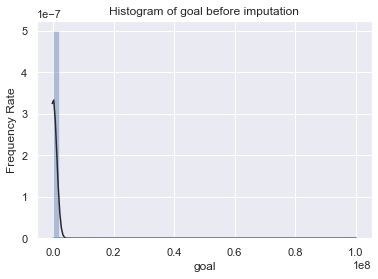

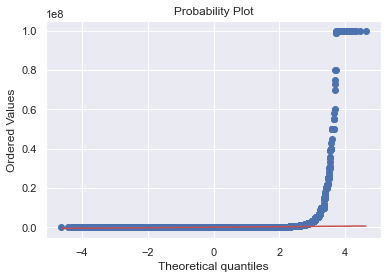

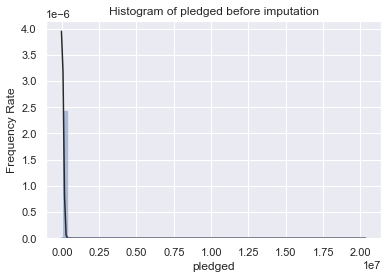

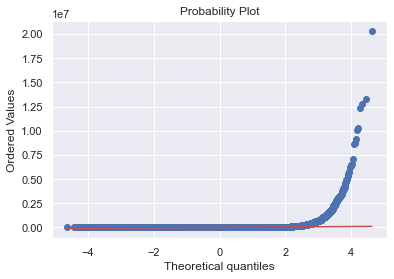

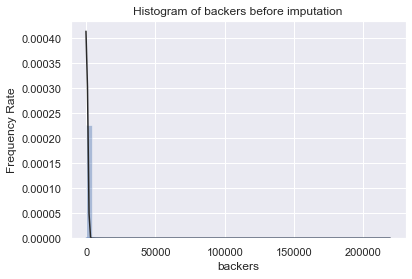

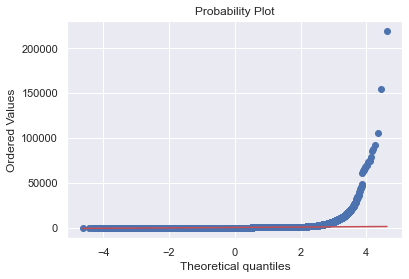

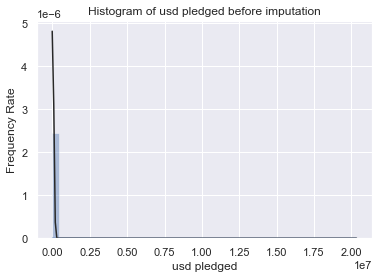

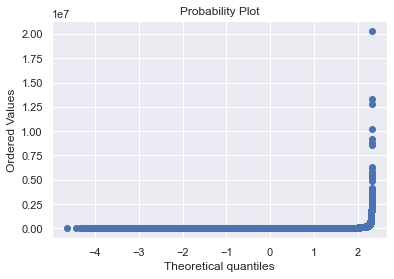

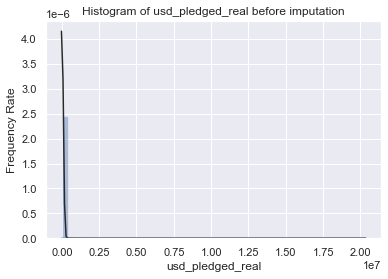

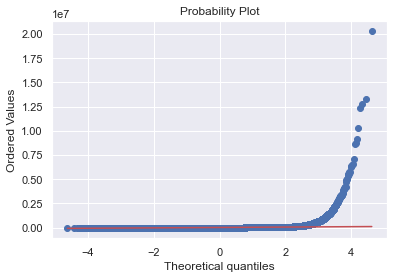

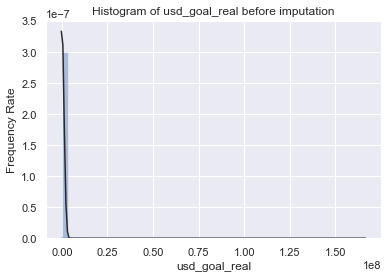

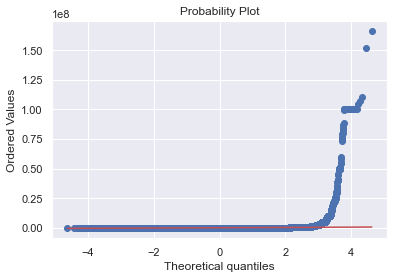

<Figure size 432x288 with 0 Axes>

In [41]:
visualise_floats(dataframe=ks_projects
          ,variables=floats
          ,target="usd_goal_real")

### List of categories

In [43]:
categories = ks_projects.select_dtypes(include=["object"]).columns
categories

Index(['category', 'main_category', 'currency', 'deadline', 'state',
       'country'],
      dtype='object')

In [45]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x="main_category", y="usd_goal_real", data=ks_projects)
#fig = sns.swarmplot(x='main_category', y="usd_goal_real", data=ks_projects, color=".25")
fig.axis(ymin=0);
fig.figure.savefig("ini_swarm_plot.jpg")
plt.clf()

<Figure size 1152x576 with 0 Axes>

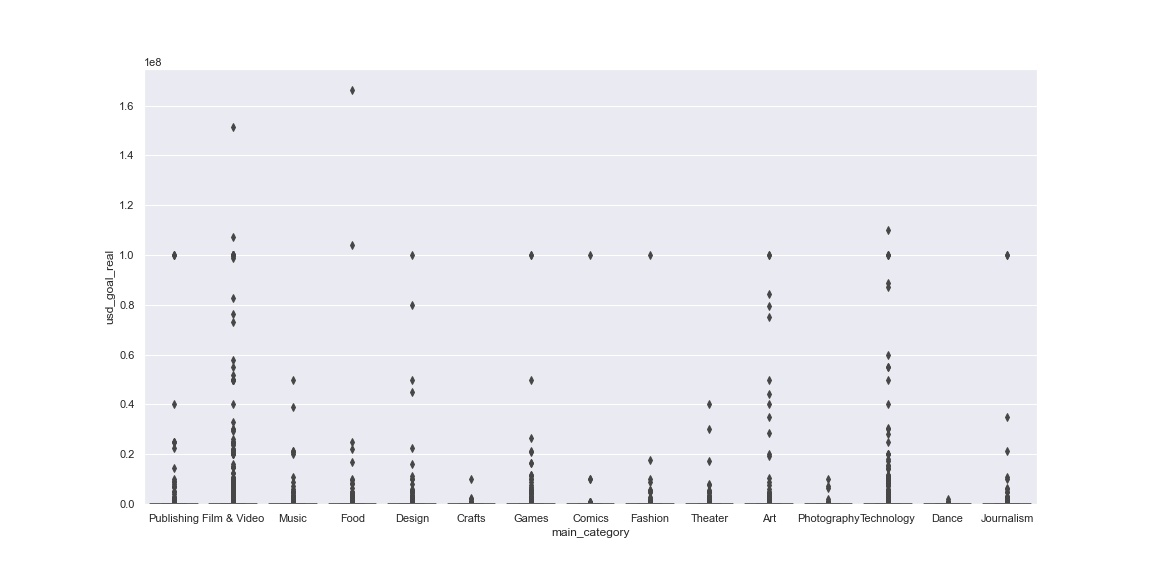

In [46]:
Image(filename='ini_swarm_plot.jpg')